## Integrantes:
1. Ignacio Morande
2. Fernando Contreras
3. Alberto Bella

# Tarea 4

El archivo adultTrain.csv tiene tiene la información de 26048 personas incluídas el tipo de trabajo, genero, país de procedencia, entre otras variables. Para esta tarea se le pide clasificar si una persona gana más de 50K (última variable). Específicamente:
1. Cree una red neuronal como usted estime conveniente y estime el error del modelo entrenado (1 punto).
2. Entrene una red encoder/decoder sobre las variables nominales (1.5 puntos).
3. Cree una nueva red neuronal utilizando los datos origianles que estime conveniente y generados por el encoder del punto 2 (1.5 punto). Obviamente, no incluya una misma variable dos veces. Es decir, si incluyó una variable nominal en este punto, no incluya la misma variable codificada.
4. Compare los errores de los modelos y seleccione el mejor (0.5 puntos).
5. Clasifique los datos de adultEval.csv y entregue un archivo csv con la clasificación de cada punto (1.5 puntos). El archivo tendrá una sola columna indicando <=50K o >50K para cada uno de los puntos de evaluación. Tal como en la tarea 2, su puntaje dependerá de su rendimiento comparado con el resto. Especificamente, se evaluará el F1-score donde positive corresponderá a la clase más pequeña.

Justifique todo el proceso realizado, por ejemplo creación de variables, selección de modelos, verificación de overfitting, y/u otros.

## Descripción de variables

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_train = pd.read_csv('adultTrain.csv')
data_eval = pd.read_csv('adultEval.csv')

data_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,62,Federal-gov,159165,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,0,36,United-States,<=50K
1,59,Private,169982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2002,50,United-States,<=50K
2,34,Self-emp-inc,157466,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,45,United-States,<=50K
3,49,Private,323773,11th,7,Married-civ-spouse,Priv-house-serv,Other-relative,White,Female,0,0,40,United-States,<=50K
4,38,Private,63509,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


In [ ]:
data_eval.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,28,Private,227840,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Female,0,0,40,United-States
1,34,Private,287315,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States
2,50,Private,221791,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,Black,Male,0,0,40,United-States
3,38,Private,22042,Assoc-voc,11,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,39,United-States
4,60,Self-emp-not-inc,376973,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,42,United-States


In [ ]:
data_train.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,26048.000000,2.604800e+04,26048.000000,26048.000000,26048.000000,26048.000000
mean,38.538429,1.896108e+05,10.080620,1088.267967,87.660243,40.478885
std,13.580110,1.053760e+05,2.572918,7477.100025,403.713567,12.327848
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.181030e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784690e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.368860e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data_train.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.072163,0.032410,0.073846,0.057627,0.069460
fnlwgt,-0.072163,1.000000,-0.042859,0.002212,-0.006289,-0.016064
education.num,0.032410,-0.042859,1.000000,0.123963,0.086306,0.147806
capital.gain,0.073846,0.002212,0.123963,1.000000,-0.031604,0.077872
capital.loss,0.057627,-0.006289,0.086306,-0.031604,1.000000,0.058472
hours.per.week,0.069460,-0.016064,0.147806,0.077872,0.058472,1.000000


(array([19767.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  6281.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

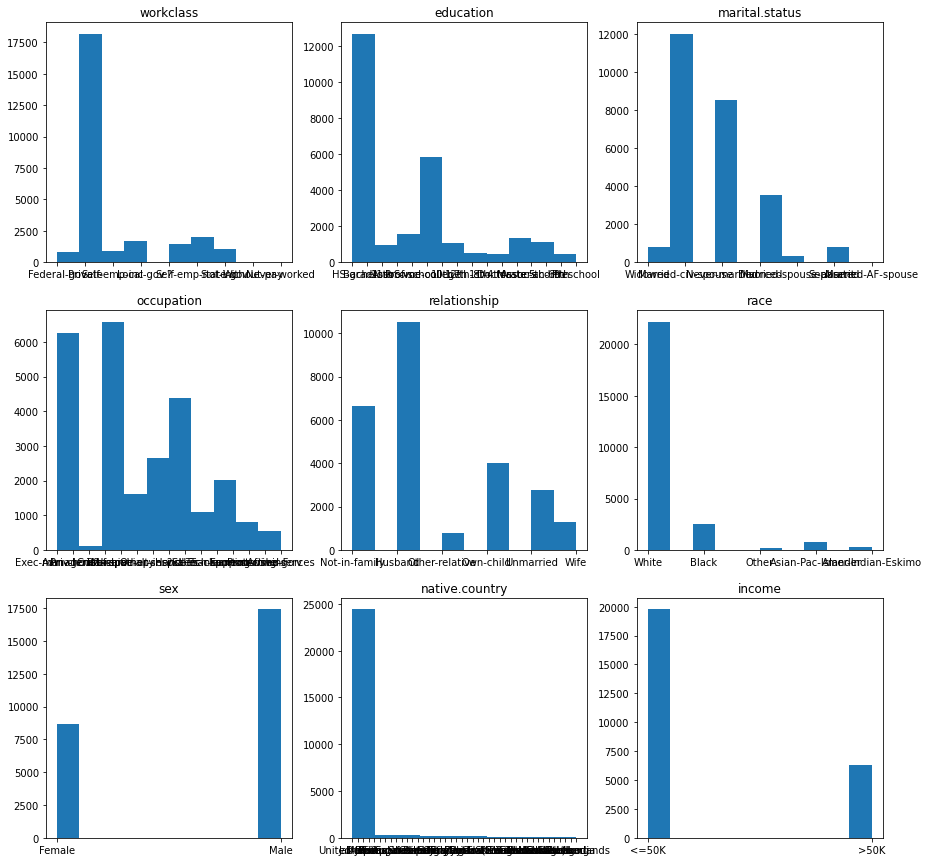

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

ax[0,0].set_title('workclass')
ax[0,0].hist(data_train['workclass'])

ax[0,1].set_title('education')
ax[0,1].hist(data_train['education'])

ax[0,2].set_title('marital.status')
ax[0,2].hist(data_train['marital.status'])

ax[1,0].set_title('occupation')
ax[1,0].hist(data_train['occupation'])

ax[1,1].set_title('relationship')
ax[1,1].hist(data_train['relationship'])

ax[1,2].set_title('race')
ax[1,2].hist(data_train['race'])

ax[2,0].set_title('sex')
ax[2,0].hist(data_train['sex'])

ax[2,1].set_title('native.country')
ax[2,1].hist(data_train['native.country'])

ax[2,2].set_title('income')
ax[2,2].hist(data_train['income'])

In [ ]:
data_train.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

## Preprocesamiento

In [ ]:
# from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler

ndata = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

scaler = StandardScaler()
scaler.fit(data_train[ndata])
data_train[ndata] = scaler.transform(data_train[ndata])
# data_train[ndata]

data_train['income'] = data_train['income'].replace({'>50K':0, '<=50K':1})

In [ ]:
from tensorflow.keras.utils import to_categorical

data_train_onehot = pd.DataFrame()
cdata = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

for col in cdata:
  data_train[col] = pd.Categorical(data_train[col])
  data_train[col] = data_train[col].cat.codes

  temp = pd.DataFrame(to_categorical(data_train[col]).astype('int'))
  temp.columns = [str(col) + str(tempCol) for tempCol in temp.columns]
  data_train_onehot = pd.concat([data_train_onehot, temp], axis=1)

In [ ]:
data_train = data_train.drop(columns=cdata)
total_data_train = pd.concat([data_train, data_train_onehot], axis=1)

total_data_train

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass0,workclass1,workclass2,workclass3,workclass4,workclass5,workclass6,workclass7,workclass8,education0,education1,education2,education3,education4,education5,education6,education7,education8,education9,education10,education11,education12,education13,education14,education15,marital.status0,marital.status1,marital.status2,marital.status3,marital.status4,marital.status5,marital.status6,occupation0,...,native.country2,native.country3,native.country4,native.country5,native.country6,native.country7,native.country8,native.country9,native.country10,native.country11,native.country12,native.country13,native.country14,native.country15,native.country16,native.country17,native.country18,native.country19,native.country20,native.country21,native.country22,native.country23,native.country24,native.country25,native.country26,native.country27,native.country28,native.country29,native.country30,native.country31,native.country32,native.country33,native.country34,native.country35,native.country36,native.country37,native.country38,native.country39,native.country40,native.country41
0,1.727675,-0.288931,-0.420006,-0.145550,-0.217139,-0.363321,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.506760,-0.186278,1.134679,-0.145550,4.741918,0.772341,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.334203,-0.305055,-0.420006,-0.145550,-0.217139,0.366747,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.770375,1.273201,-1.197349,-0.145550,-0.217139,-0.038847,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-0.039649,-1.196707,0.357336,-0.145550,-0.217139,0.772341,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,1.138567,-0.705362,1.134679,-0.145550,-0.217139,0.366747,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
26044,0.328543,-0.021721,-0.420006,-0.145550,-0.217139,0.366747,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
26045,0.402182,-0.275560,-0.420006,-0.145550,-0.217139,1.989121,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
26046,-1.217865,-0.847133,1.134679,1.666685,-0.217139,1.177934,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Parte 1: Modelo FFN

In [ ]:
# from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from tensorflow.keras import *
from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=50, restore_best_weights=True, verbose=0)

X = total_data_train.drop(columns='income')
y = total_data_train['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

inputLayer = layers.Input(shape=(108,))
hiddenLayer = layers.Dense(108, activation='relu', use_bias=True, kernel_regularizer=regularizers.l2(0.005))(inputLayer)
hiddenLayer1 = layers.Dense(108, activation='relu', use_bias=True, kernel_regularizer=regularizers.l2(0.005))(hiddenLayer)
hiddenLayer2 = layers.Dense(108, activation='relu', use_bias=True, kernel_regularizer=regularizers.l2(0.005))(hiddenLayer1)
outputLayer = layers.Dense(1, activation='sigmoid', use_bias=True)(hiddenLayer2)

feedForward = models.Model(inputLayer, outputLayer)
feedForward.compile(loss ='BinaryCrossentropy', optimizer = 'adam', metrics = ['binary_accuracy'])
eval = feedForward.fit(X_train[:1000], y_train[:1000], validation_data = (X_test, y_test), batch_size = 32, epochs = 100, verbose = 0, shuffle = True, callbacks=[earlystopping])

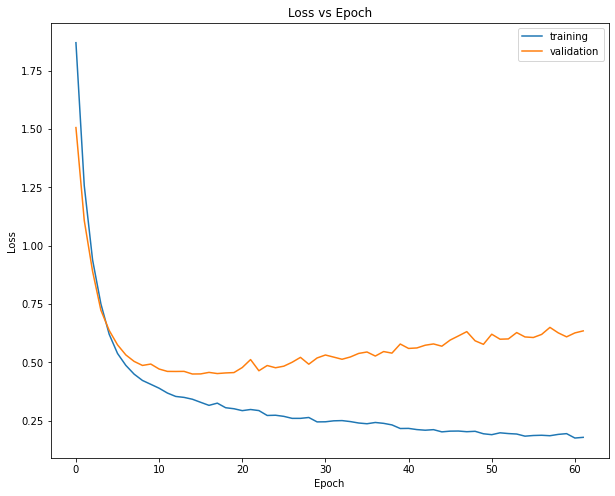

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Loss vs Epoch')
plt.plot(eval.history['loss'], label='training')
plt.plot(eval.history['val_loss'], label='validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

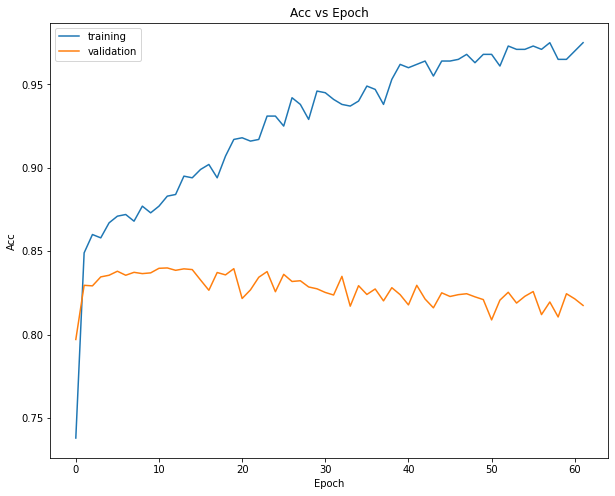

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Acc vs Epoch')
plt.plot(eval.history['binary_accuracy'], label='training')
plt.plot(eval.history['val_binary_accuracy'], label='validation')
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

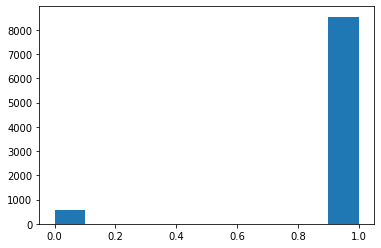

In [ ]:
data_predicted = feedForward.predict(X_test)
data_predicted = (data_predicted > 0.2).astype(int)

plt.hist(data_predicted)
plt.show()

In [ ]:
from sklearn.metrics import f1_score

f1_score(data_predicted, y_test)

0.8857253785427721

## Parte 2: Autoencoder

In [ ]:
# SINGLE AUTOENCODER
import pandas as pd
from tensorflow.keras import *

nominal_data = data_train_onehot
#nominal_data = pd.read_csv('adultTrain.csv')
#nominal_data = nominal_data.iloc[:,[1,3,5,6,7,8,9,13]]

col_num = 102
encoding_num = 20

# Creación red
input_layer = layers.Input(shape=(col_num,))
hidden_layer = layers.Dense(encoding_num, activation='linear',use_bias = True)(input_layer)
output_layer = layers.Dense(col_num, activation='linear',use_bias = True)(hidden_layer)

# Creación modelo
autoencoder = models.Model(input_layer, output_layer)
autoencoder.compile(loss='mse', optimizer = 'adam')
eval = autoencoder.fit(nominal_data, nominal_data,epochs=100,batch_size=32,shuffle=True,verbose = 0)


In [ ]:
#Errores
#MSE = []
#MSE.append(np.mean(eval.history['mse']))
#MSE
print(eval.history)

{'loss': [0.023905610665678978, 0.009564373642206192, 0.008467594161629677, 0.008232949301600456, 0.008176292292773724, 0.008152801543474197, 0.00813974067568779, 0.008133440278470516, 0.008123910054564476, 0.008115740492939949, 0.008106090128421783, 0.008094613440334797, 0.008082594722509384, 0.00807257741689682, 0.008064059540629387, 0.008056907914578915, 0.008054089732468128, 0.008052113465964794, 0.008048945106565952, 0.00805013719946146, 0.008048114366829395, 0.008048039861023426, 0.008044677786529064, 0.008044308051466942, 0.008046888746321201, 0.008045468479394913, 0.008045366033911705, 0.008043408393859863, 0.008042552508413792, 0.008043613284826279, 0.008044012822210789, 0.008041467517614365, 0.008042913861572742, 0.008041576482355595, 0.00804178137332201, 0.00804148055613041, 0.008041354827582836, 0.00804093386977911, 0.008039938285946846, 0.008040506392717361, 0.008039700798690319, 0.008039934560656548, 0.008040623739361763, 0.00803933385759592, 0.008037908934056759, 0.00803

In [ ]:
# Selección desde la capa de entrada y el espacio latente, y encoding de los datos
encoder = models.Model(input_layer, hidden_layer)
encoded_data = encoder.predict(nominal_data)

In [ ]:
df_nominal = pd.DataFrame(encoded_data, columns=['nominal '+ str(i) for i in range(encoding_num)])

In [ ]:
# Creación red para decoder
decoder_input = layers.Input(shape=(encoding_num,))
decoder_layer = autoencoder.layers[-1] # Última capa del modelo autoencoder

# Creación modelo del decoder y decoding de los datos
decoder = models.Model(decoder_input, decoder_layer(decoder_input))
decoded_data = decoder.predict(encoded_data)

In [ ]:
#Parte 3

data_parte3 = pd.concat([data_train, df_nominal], axis=1)
data_parte3

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,nominal 0,nominal 1,nominal 2,nominal 3,nominal 4,nominal 5,nominal 6,nominal 7,nominal 8,nominal 9,nominal 10,nominal 11,nominal 12,nominal 13,nominal 14,nominal 15,nominal 16,nominal 17,nominal 18,nominal 19
0,1.727675,-0.288931,-0.420006,-0.145550,-0.217139,-0.363321,1,-0.068458,-0.045445,-0.049062,-0.233698,-0.068973,0.224704,-0.018033,0.277957,-0.135114,0.044392,-0.107584,0.198267,-0.189891,0.043945,0.028152,0.102108,-0.107785,0.172260,-0.126215,-0.017915
1,1.506760,-0.186278,1.134679,-0.145550,4.741918,0.772341,1,0.094360,0.235790,-0.125239,0.100507,-0.339455,0.039758,0.118659,-0.009063,0.156835,-0.207484,0.049255,0.115758,-0.148299,0.132902,0.071989,-0.003231,-0.044057,0.171944,-0.027622,-0.041317
2,-0.334203,-0.305055,-0.420006,-0.145550,-0.217139,0.366747,1,0.038519,-0.091675,0.047262,-0.037334,-0.246261,-0.100290,-0.269925,0.080764,0.133890,-0.274296,-0.003494,0.076000,-0.152363,-0.103371,0.012317,0.215111,0.025357,0.043385,-0.011029,0.006752
3,0.770375,1.273201,-1.197349,-0.145550,-0.217139,-0.038847,1,0.108738,-0.124883,-0.058614,0.032898,-0.168602,0.091087,0.131782,-0.102614,-0.086793,0.080525,-0.060551,0.113790,0.054407,-0.022820,0.148456,0.057107,0.107177,-0.003077,0.011334,-0.160757
4,-0.039649,-1.196707,0.357336,-0.145550,-0.217139,0.772341,1,-0.103820,0.061926,-0.019479,0.021575,-0.338386,-0.057145,0.068365,-0.156024,0.172283,-0.000947,-0.061597,0.013637,-0.122631,-0.067811,0.183640,0.051933,0.101523,-0.031025,0.248800,-0.054384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,1.138567,-0.705362,1.134679,-0.145550,-0.217139,0.366747,0,-0.011550,0.110822,0.036419,-0.002761,-0.373534,0.055070,0.053242,-0.124541,0.024193,-0.012829,0.173503,0.074490,0.030709,0.217948,0.007351,-0.223602,-0.327971,0.326159,-0.109452,0.107502
26044,0.328543,-0.021721,-0.420006,-0.145550,-0.217139,0.366747,1,-0.011805,-0.218143,0.021228,-0.202335,-0.059492,0.058522,-0.204938,-0.264286,0.313146,0.167141,-0.060059,0.023984,-0.061641,0.096727,-0.159237,-0.017644,-0.303694,0.131107,-0.211472,0.181481
26045,0.402182,-0.275560,-0.420006,-0.145550,-0.217139,1.989121,0,-0.155563,-0.018117,-0.020526,0.008210,-0.251527,-0.150811,0.057733,-0.076763,0.203481,-0.089236,-0.185954,0.077188,-0.202818,-0.132147,0.091084,0.067745,0.032570,0.150938,0.137873,-0.044721
26046,-1.217865,-0.847133,1.134679,1.666685,-0.217139,1.177934,0,-0.027961,0.206739,-0.091162,0.194094,-0.096073,-0.035223,-0.002243,-0.064805,-0.132118,0.134089,-0.118575,0.053215,-0.218544,0.056151,0.088767,-0.013155,-0.079886,0.196790,0.287892,0.253713


## Parte 3: Modelo + Datos codificados

In [ ]:
# from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from tensorflow.keras import *
from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=50, restore_best_weights=True, verbose=0)

X = data_parte3.drop(columns='income')
y = data_parte3['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

inputLayer = layers.Input(shape=(26,))
hiddenLayer = layers.Dense(26, activation='relu', use_bias=True, kernel_regularizer=regularizers.l2(0.005))(inputLayer)
hiddenLayer1 = layers.Dense(26, activation='relu', use_bias=True, kernel_regularizer=regularizers.l2(0.005))(hiddenLayer)
hiddenLayer2 = layers.Dense(26, activation='relu', use_bias=True, kernel_regularizer=regularizers.l2(0.005))(hiddenLayer1)
outputLayer = layers.Dense(1, activation='sigmoid', use_bias=True)(hiddenLayer2)

feedForward = models.Model(inputLayer, outputLayer)
feedForward.compile(loss ='BinaryCrossentropy', optimizer = 'adam', metrics = ['binary_accuracy'])
eval = feedForward.fit(X_train[:1000], y_train[:1000], validation_data = (X_test, y_test), batch_size = 32, epochs = 100, verbose = 0, shuffle = True, callbacks=[earlystopping])

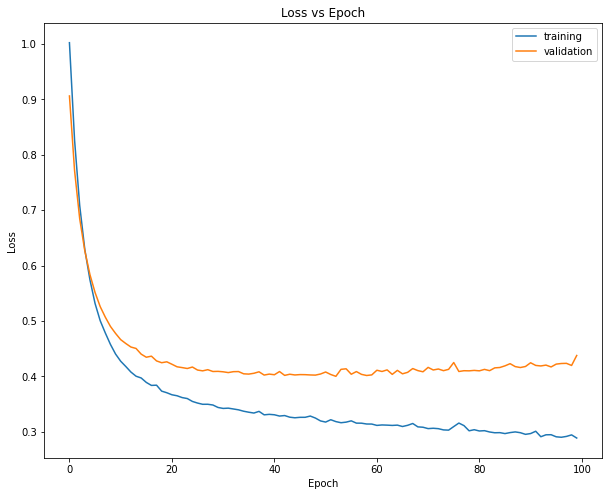

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Loss vs Epoch')
plt.plot(eval.history['loss'], label='training')
plt.plot(eval.history['val_loss'], label='validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

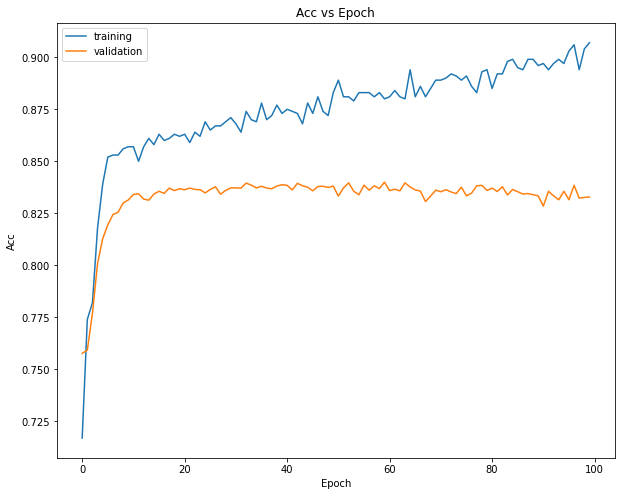

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Acc vs Epoch')
plt.plot(eval.history['binary_accuracy'], label='training')
plt.plot(eval.history['val_binary_accuracy'], label='validation')
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

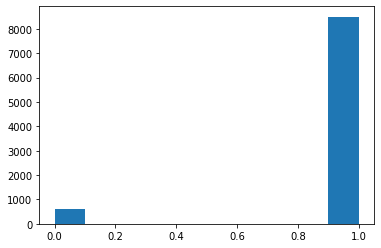

In [ ]:
data_predicted = feedForward.predict(X_test)
data_predicted = (data_predicted > 0.2).astype(int)

plt.hist(data_predicted)
plt.show()

In [ ]:
from sklearn.metrics import f1_score

f1_score(data_predicted, y_test)

0.8873019994806544

## Parte 4: Comparación de modelos

1. Modelo FFN
- F1_score: 0.885

2. Modelo FFN + encoded data
- F1_score: 0.887

## Parte 5: Predicción de variables

In [ ]:
# data_eval
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

ndata = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

scaler = StandardScaler()
scaler.fit(data_eval[ndata])
data_eval[ndata] = scaler.transform(data_eval[ndata])

data_eval_onehot = pd.DataFrame()
cdata = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

for col in cdata:
  data_eval[col] = pd.Categorical(data_eval[col])
  data_eval[col] = data_eval[col].cat.codes

  temp = pd.DataFrame(to_categorical(data_eval[col]).astype('int'))
  temp.columns = [str(col) + str(tempCol) for tempCol in temp.columns]
  data_eval_onehot = pd.concat([data_eval_onehot, temp], axis=1)

data_eval = data_eval.drop(columns=cdata)
total_data_eval = pd.concat([data_eval, data_eval_onehot], axis=1)

total_data_eval

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass0,workclass1,workclass2,workclass3,workclass4,workclass5,workclass6,workclass7,workclass8,education0,education1,education2,education3,education4,education5,education6,education7,education8,education9,education10,education11,education12,education13,education14,education15,marital.status0,marital.status1,marital.status2,marital.status3,marital.status4,marital.status5,occupation0,occupation1,occupation2,...,native.country1,native.country2,native.country3,native.country4,native.country5,native.country6,native.country7,native.country8,native.country9,native.country10,native.country11,native.country12,native.country13,native.country14,native.country15,native.country16,native.country17,native.country18,native.country19,native.country20,native.country21,native.country22,native.country23,native.country24,native.country25,native.country26,native.country27,native.country28,native.country29,native.country30,native.country31,native.country32,native.country33,native.country34,native.country35,native.country36,native.country37,native.country38,native.country39,native.country40
0,-0.774947,0.351952,-0.420274,-0.147757,-0.214734,-0.021874,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-0.342599,0.911768,-0.420274,-0.147757,-0.214734,-0.021874,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.810329,0.295015,0.746165,-0.147757,-0.214734,-0.021874,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-0.054367,-1.585147,0.357352,-0.147757,-0.214734,-0.102363,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1.530909,1.755685,-0.420274,-0.147757,-0.214734,0.139104,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,-1.495527,0.256913,-1.197900,-0.147757,-0.214734,-0.021874,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6509,-0.270541,-0.536468,-1.586713,-0.147757,-0.214734,0.783017,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6510,0.089749,2.973264,2.301417,-0.147757,-0.214734,-0.021874,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6511,-1.207295,-0.727347,-0.031461,-0.147757,-0.214734,-1.631655,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [120]:
input_layer = layers.Input(shape=(100,))
hidden_layer = layers.Dense(20, activation='linear',use_bias = True)(input_layer)
output_layer = layers.Dense(100, activation='linear',use_bias = True)(hidden_layer)

autoencoder = models.Model(input_layer, output_layer)
autoencoder.compile(loss='mse', optimizer = 'adam')
eval = autoencoder.fit(data_eval_onehot, data_eval_onehot, epochs=100,batch_size=32,shuffle=True,verbose = 0)

encoder = models.Model(input_layer, hidden_layer)
encoded_data = encoder.predict(data_eval_onehot)

data_parte5 = pd.concat([data_eval, pd.DataFrame(encoded_data)], axis=1)
data_parte5

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.774947,0.351952,-0.420274,-0.147757,-0.214734,-0.021874,0.098658,-0.142302,0.213865,0.074137,-0.231227,0.097272,-0.150207,-0.014647,-0.205061,0.366650,0.263925,-0.171758,-0.663689,0.213966,-0.026555,0.091972,0.230624,-0.221983,0.182532,-0.144452
1,-0.342599,0.911768,-0.420274,-0.147757,-0.214734,-0.021874,0.070568,-0.447070,-0.104269,-0.647106,-0.228139,-0.384712,-0.043000,0.174420,-0.079121,0.272951,0.045940,-0.274274,-0.298568,0.132706,-0.022604,0.261529,-0.132105,-0.256663,0.635055,0.043725
2,0.810329,0.295015,0.746165,-0.147757,-0.214734,-0.021874,0.078106,0.258704,0.143364,0.011220,0.063085,-0.208763,0.083647,0.527093,0.345644,0.123261,0.391280,0.225673,-0.047456,-0.346735,-0.285570,0.074766,-0.335153,-0.036437,0.200236,-0.042158
3,-0.054367,-1.585147,0.357352,-0.147757,-0.214734,-0.102363,0.210179,0.092643,0.019253,0.131815,-0.251339,0.004868,-0.134780,-0.082371,-0.066551,0.570356,-0.106800,0.133345,-0.528583,0.454756,-0.305567,-0.062765,-0.037360,-0.390040,0.006885,-0.196791
4,1.530909,1.755685,-0.420274,-0.147757,-0.214734,0.139104,0.157356,-0.068792,-0.227140,0.371045,-0.159223,-0.578793,-0.052166,0.189445,-0.130452,0.086808,0.326002,-0.241621,0.258892,-0.325098,0.258479,0.335993,0.066529,-0.520373,-0.118494,-0.366349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,-1.495527,0.256913,-1.197900,-0.147757,-0.214734,-0.021874,-0.231659,0.263214,0.018824,0.277753,-0.062585,0.259110,0.409870,-0.187479,0.077810,0.884185,-0.073167,-0.064429,-0.233725,0.134883,0.089357,0.146830,0.075947,0.019211,0.224650,-0.373387
6509,-0.270541,-0.536468,-1.586713,-0.147757,-0.214734,0.783017,0.082106,-0.206365,-0.164966,-0.548969,-0.072627,-0.346511,-0.058144,0.090133,0.071563,0.380796,-0.021139,-0.075802,-0.073409,0.326748,-0.181093,0.298264,-0.230626,-0.262254,0.732921,0.167922
6510,0.089749,2.973264,2.301417,-0.147757,-0.214734,-0.021874,0.134420,0.044942,-0.084501,-0.212831,0.089897,-0.236278,0.121978,0.156050,0.154455,-0.256761,-0.324625,0.158488,-0.107615,-0.324552,-0.156787,-0.045201,-0.239046,-0.356587,-0.534106,-0.295939
6511,-1.207295,-0.727347,-0.031461,-0.147757,-0.214734,-1.631655,0.093610,0.216674,0.234483,-0.018893,-0.096766,0.621092,-0.144091,0.176165,-0.251710,0.968485,-0.425146,-0.172836,0.151425,-0.210217,0.224736,0.288038,0.167877,-0.235463,-0.157884,0.016738


In [ ]:
data_eval_predicted = feedForward.predict(data_parte5)
data_eval_predicted = (data_eval_predicted > 0.2).astype(int)
data_eval_predicted

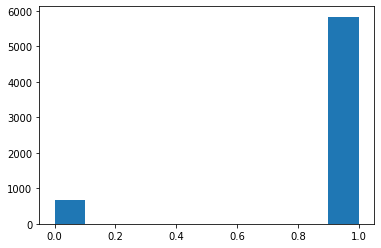

In [124]:
plt.hist(data_eval_predicted)
plt.show()

In [134]:
data_eval_predicted = pd.DataFrame(data_eval_predicted)

data_eval_predicted = data_eval_predicted.replace({0:'>50K', 1:'<=50K'})
data_eval_predicted = data_eval_predicted.rename(columns={0: 'income'}, inplace = False)

data_eval_predicted.to_csv('data_eval_predicted.csv', index=False)
# data_eval_predicted